# Importing libraries
The first step is to import the necessary libraries

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.linear_model import LogisticRegression


# Importing the data set
We are storing all of our data in a dataframe "df"

In [2]:
df=pd.read_csv('../input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


To do manipulations in dataframe, it is good to have 1's and 0's instead of Yes and No. So we are now replacing all the strings "yes" with 1 and all the strings "No" with "0". 

In [3]:
df = df.replace(['Yes','No','Positive','Negative'],[1,0,1,0])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#                                                **DATA CLEANING**
We will now check for any presence of redundant values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    int64 
 3   Polydipsia          520 non-null    int64 
 4   sudden weight loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   Polyphagia          520 non-null    int64 
 7   Genital thrush      520 non-null    int64 
 8   visual blurring     520 non-null    int64 
 9   Itching             520 non-null    int64 
 10  Irritability        520 non-null    int64 
 11  delayed healing     520 non-null    int64 
 12  partial paresis     520 non-null    int64 
 13  muscle stiffness    520 non-null    int64 
 14  Alopecia            520 non-null    int64 
 15  Obesity             520 non-null    int64 
 16  class               520 no

From the above information, we can conclude that there are no redundant data was present. So we can move to data exploration step

#                                         **DATA EXPLORATION**

Age column contaion continuous data .so distrubtion plot is good to visuvalize the data

<AxesSubplot:ylabel='Age'>

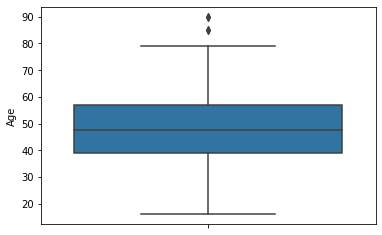

In [5]:
sns.boxplot(y=df["Age"])

In [14]:
px.histogram(df,x='Age')

In [8]:
min_age=df['Age'].min()
max_age=df['Age'].max()
print('minimum age in the data set=',min_age)
print('maximum age in the data set=',max_age)

minimum age in the data set= 16
maximum age in the data set= 90


We observed that, we have a data set containing people of different age groups ranging from 16 to 90, with more number of middle aged people

In [13]:
px.histogram(df,x='Gender')


We have more number of Male(328) in our data set than number of female(192)

In [22]:
px.histogram(df,x='Polyuria')

We have almost equal number of people suffering from polyuria(262) and people not having Polyuria(258)

In [17]:
px.histogram(df,x='Polydipsia')

We have almost more number of people suffering from polydipsia(262) than people not having Polydipsia(258)

In [24]:
px.histogram(df,x='sudden weight loss')

We have more number of people are observed to have sudden weight loss(303)

In [27]:
for i in df.columns[5:]:
    fig=px.histogram(df,x=i)
    fig.sho

Similarly we can observe the histograms of other features as well.
And we have More number of Diabetic people(320) in our data set

Now we will observe how the features are related to output. This can be observed by correlation heatmap 

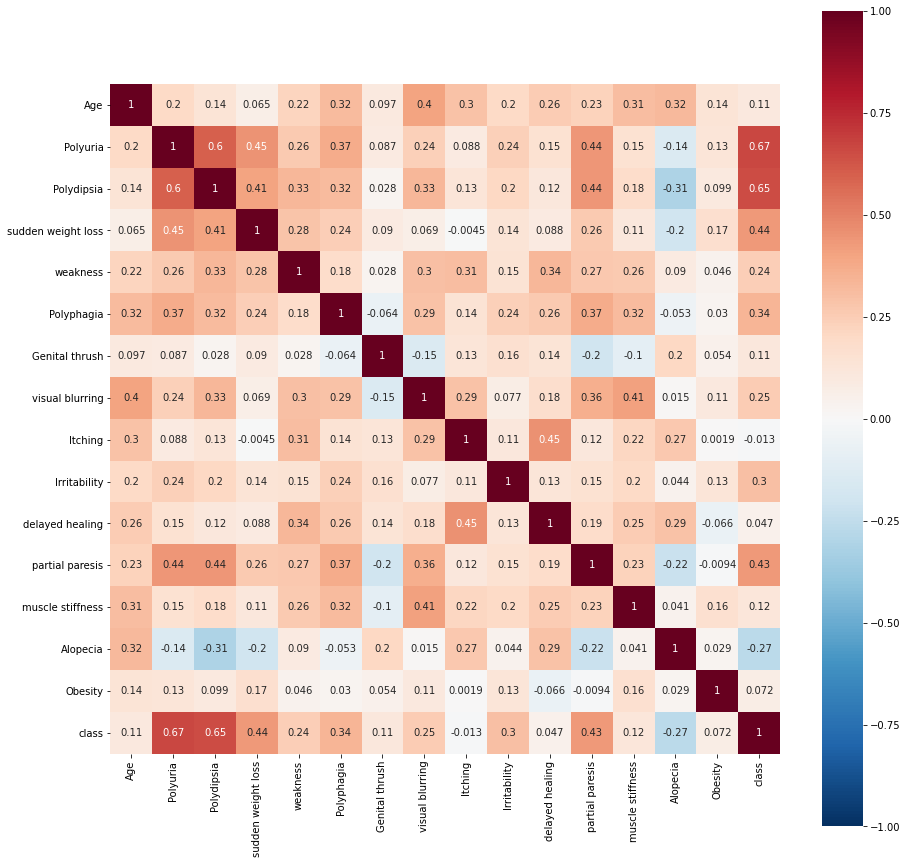

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, cmap='RdBu_r', vmin=-1.0, vmax=1.0)
plt.show()

We can see that Polyuria, Polydipsia are having highest influence on the output and Obesity, Itching, delayed healing are having least impact on output 

The same can be observed by the below violin plots

<AxesSubplot:xlabel='Polyuria', ylabel='class'>

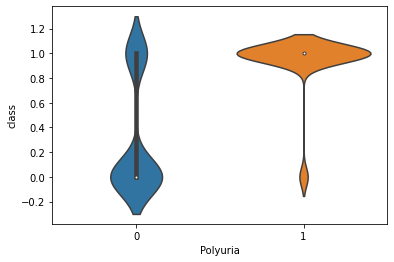

In [29]:
sns.violinplot(x='Polyuria',y='class', data=df)

<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

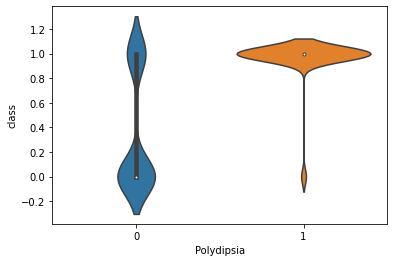

In [30]:
sns.violinplot(x='Polydipsia',y='class', data=df)

<AxesSubplot:xlabel='Polyuria', ylabel='Polydipsia'>

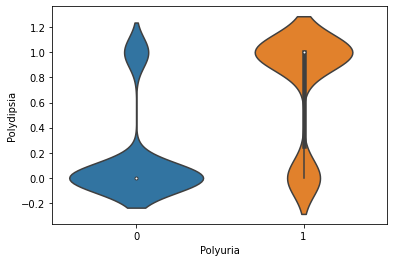

In [31]:
sns.violinplot(x='Polyuria',y='Polydipsia', data=df)

The aboveplots are indicating that a person having Polyuria, then he is likely to have Polydipsia as well and finally turn out to be Diabetic. And if a person is  not having Polyuria, then there are great chances that he is not having Polydipsia and diabetes

<AxesSubplot:xlabel='Obesity', ylabel='class'>

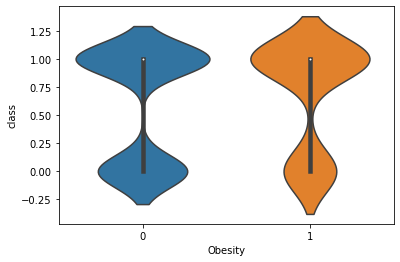

In [37]:
sns.violinplot(x='Obesity',y='class', data=df)


<AxesSubplot:xlabel='Itching', ylabel='class'>

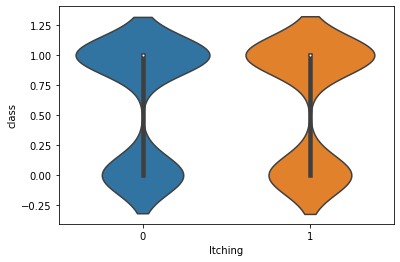

In [38]:
sns.violinplot(x='Itching',y='class', data=df)

<AxesSubplot:xlabel='delayed healing', ylabel='class'>

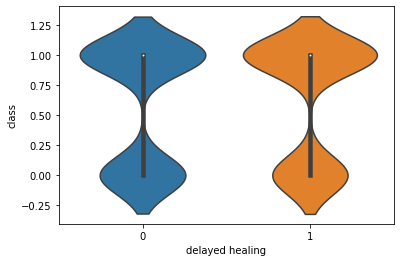

In [39]:
sns.violinplot(x='delayed healing',y='class', data=df)

The above plots indicate that Obesity, Itching and delayed healing not much affecting the outcome

# Applying Logistic Regression

To perform mathematical calculations we are removingthe Gender column, as it contain string data type

In [47]:
df=df.drop('Gender',1)
df.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


We will now divide out data set into training set, test set and cross validation set

In [74]:
Training_set = df[:480]
Test_set = df[480:500]
cross_validation_set = df[500:]


To perform mathematical caluculations, it is easy to deal with numpy arrays. so we are converting the training and testing data into numpy arrays 

In [75]:
trainLabel = np.asarray(df['class'])
trainData = np.asarray(df.drop('class',1))
testLabel = np.asarray(df['class'])
testData = np.asarray(df.drop('class',1))


In [76]:
trainData

array([[40,  0,  1, ...,  1,  1,  1],
       [58,  0,  0, ...,  0,  1,  0],
       [41,  1,  0, ...,  1,  1,  0],
       ...,
       [58,  1,  1, ...,  1,  0,  1],
       [32,  0,  0, ...,  0,  1,  0],
       [42,  0,  0, ...,  0,  0,  0]])

Feature scaling and Normalization of data

In [77]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

Applying logistic regression

In [78]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [79]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  89.23076923076924 %


our model is showing 89% accuracy on test set 

Text(0.5, 0, 'Importance')

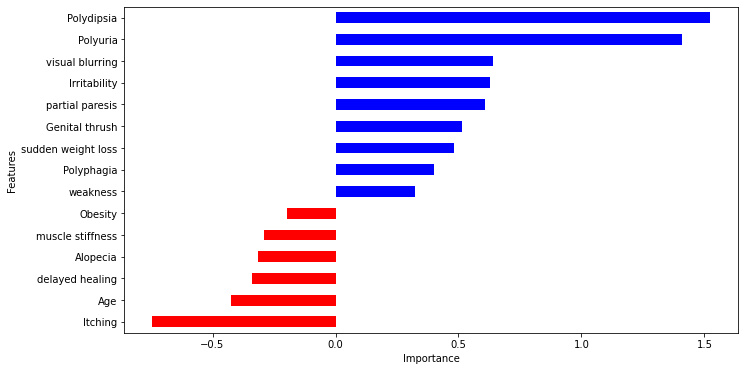

In [80]:
trainData = Training_set.drop('class',1)
coeff = list(diabetesCheck.coef_[0])
labels = list(trainData.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the coefficients of the logistic regression fit, we can again observe that Polyuria and Polydipsia are the most important features and Obesity is the least important feature  

In [81]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

We saved our model in pickel file format using joblib library 

In [82]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  89.23076923076924 %


Aplying our model on cross validation set

In [83]:
sampleData = cross_validation_set[:]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('class',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
#print('Probability:', predictionProbability)
print('prediction:', prediction)

prediction: [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
